In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'Datasets/data.csv'
file_df = pd.read_csv(file)
File_df = pd.DataFrame(file_df)
File_df['Countries'].value_counts().head(25)
America = File_df.loc[(File_df['Countries'] == 'United States of America') |
                      (File_df['Countries'] == 'Mexico') |
                      (File_df['Countries'] == 'Canada') |
                      (File_df["Countries"] == 'Canada, United States of America'),:]
America.head(10)

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
68,1506,Huasteca Náhuatl,náhuatl du Huasteca,nahua de la Huasteca,Mexico,MEX,nhe,Vulnerable,Mexicano,NaN,463183.0,"Census 2000, information provided by INALI for...",21.3835,-98.9902,Locality of Xilitla and others in the municipa...
82,1503,Central Náhuatl,náhuatl central,nahua central,Mexico,MEX,"nhn, nch, ncx",Vulnerable,"Mexicano, Aztec (in English only)",NaN,395581.0,"Census 2000, information provided by INALI for...",19.1910,-99.0236,Locality of Milpa Alta and others with few rem...
156,784,Navajo,navajo,navajo,United States of America,USA,nav,Vulnerable,"Navajo, Diné",NaN,120000.0,"Platero, Paul. 2001. Navajo head start languag...",35.8044,-108.4750,the Navajo Nation is located in the region of ...
160,916,Sierra Totonac,totonaque de la Sierra,totonacano de Sierra,Mexico,MEX,tos,Severely endangered,"Highland Totonac, Totonaco central del sur",NaN,118367.0,Contributors: Carolyn MacKay and Frank Tresche...,20.2461,-97.6586,"Ahuacatlán, Amixtlán, Atlequizayán, Camocuautl..."
166,904,Phurhepecha,purepecha,purépecha,Mexico,MEX,tsz,Vulnerable,"Purépecha, Tarasco, Porhé",NaN,102988.0,Census 2000\nContributor: Claudine Chamoreau ...,19.3111,-102.0410,NaN
187,932,Mezquital Otomí,otomí de Mezquital,otomí del valle de Mezquital,Mexico,MEX,ote,Definitely endangered,"hñähñú, ñänhü, ñandú, ñohño, ñanhmu",NaN,88789.0,NaN,20.4831,-99.2170,"Ajacuba, Ixmiquilpan, San Bartolo Tutotepec, T..."
188,940,Eastern Mazahua,mazahua oriental,mazahua oriental,Mexico,MEX,NaN,Definitely endangered,jnatrjo,NaN,88001.0,"Census 2000, information provided by INALI and...",19.7129,-99.9515,"Donato Guerra, Ixtlahuaca, Jocotitlán, San Fel..."
190,928,Central Otomí,otomí central,otomí central,Mexico,MEX,NaN,Definitely endangered,"State of Mexico Otomí, hñähñú, ñöthó, ñható, h...",NaN,84593.0,"Census 2000, Lastra's research",19.4661,-99.5944,"Municipalities of Acambay, Chapa de Mota, Huix..."
228,1504,Sierra de Puebla Náhuatl,náhuatl de la Sierra de Puebla,nahua de la sierra de Puebla,Mexico,MEX,NaN,Definitely endangered,Mexicano,NaN,57189.0,"Census 2000, information provided by INALI for...",19.6223,-97.8149,"Municipalities of Chilchotla, Chichiquila, Ixt..."
251,915,Papantla Totonac,totonaque de Papantla,totonaco papantla,Mexico,MEX,top,Definitely endangered,"Lowland Totonac, Totonaco de la costa",NaN,49748.0,Contributors: Carolyn MacKay and Frank Tresche...,20.4477,-97.3200,"Cazones, Coatzintla, Espinal, Papantla, Tecolu..."


In [3]:
File_DF = America.iloc[:, [0, 1, 4, 7, 10, 12, 13, 14]]
Population_Dict = {'Mexico':126200000, 'Canada':36740000, 'United States of America':325000000, 'Canada, United States of America':361740000}
File_DF['Population'] = File_DF['Countries'].map(Population_Dict)
File_DF['Speaker Percentage'] = (File_DF['Number of speakers'] / File_DF['Population'])*100
File_DF["Speaker Percentage"] = File_DF["Speaker Percentage"].map("{:,.2f}%".format)
File_DF = File_DF[['ID', 'Name in English', 'Countries', 
                   'Number of speakers', 'Population', 'Speaker Percentage',
                  'Latitude', 'Longitude', 'Degree of endangerment', 'Description of the location']]
File_DF.set_index('ID', inplace=True)
File_DF.head(15)

C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Name in English,Countries,Number of speakers,Population,Speaker Percentage,Latitude,Longitude,Degree of endangerment,Description of the location
ID,,,,,,,,,
1506,Huasteca Náhuatl,Mexico,463183.0,126200000,0.37%,21.3835,-98.9902,Vulnerable,Locality of Xilitla and others in the municipa...
1503,Central Náhuatl,Mexico,395581.0,126200000,0.31%,19.1910,-99.0236,Vulnerable,Locality of Milpa Alta and others with few rem...
784,Navajo,United States of America,120000.0,325000000,0.04%,35.8044,-108.4750,Vulnerable,the Navajo Nation is located in the region of ...
916,Sierra Totonac,Mexico,118367.0,126200000,0.09%,20.2461,-97.6586,Severely endangered,"Ahuacatlán, Amixtlán, Atlequizayán, Camocuautl..."
904,Phurhepecha,Mexico,102988.0,126200000,0.08%,19.3111,-102.0410,Vulnerable,NaN
932,Mezquital Otomí,Mexico,88789.0,126200000,0.07%,20.4831,-99.2170,Definitely endangered,"Ajacuba, Ixmiquilpan, San Bartolo Tutotepec, T..."
940,Eastern Mazahua,Mexico,88001.0,126200000,0.07%,19.7129,-99.9515,Definitely endangered,"Donato Guerra, Ixtlahuaca, Jocotitlán, San Fel..."
928,Central Otomí,Mexico,84593.0,126200000,0.07%,19.4661,-99.5944,Definitely endangered,"Municipalities of Acambay, Chapa de Mota, Huix..."
1504,Sierra de Puebla Náhuatl,Mexico,57189.0,126200000,0.05%,19.6223,-97.8149,Definitely endangered,"Municipalities of Chilchotla, Chichiquila, Ixt..."


In [4]:
def color_code(number):
    if (0.7 < number) & (number < 1):
        color = 'darkblue'
    elif (number < -0.7):
        color = 'red'
    elif (number > 0) & (number < 0.7):
        color = 'purple'
    elif (number < 0):
        color = 'lightcoral'
    else:
        color = 'black'
    return 'color: %s' % color

In [5]:
#Creating New Columns based on Degree of Endangerment
#Vulnerable
Vulnerable_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Vulnerable'), :]) 
Vulnerable_DF = pd.DataFrame(Vulnerable_DF.groupby(['Countries']).count()['Population'])
Vulnerable_DF = Vulnerable_DF.rename(columns = {'Population':'Vulnerable'})
#Definitely Endangered 
Definitely_Endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Definitely endangered'), :])
Definitely_Endangered_DF = pd.DataFrame(Definitely_Endangered_DF.groupby(['Countries']).count()['Population'])
Definitely_Endangered_DF = Definitely_Endangered_DF.rename(columns = {'Population':'Definitely endangered'})
#Critically Endangered
Critically_Endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Critically endangered'), :]) 
Critically_Endangered_DF = pd.DataFrame(Critically_Endangered_DF.groupby(['Countries']).count()['Population'])
Critically_Endangered_DF = Critically_Endangered_DF.rename(columns = {'Population':'Critically Endangered'})
Critically_Endangered_DF
#Severly Endangered
Severely_Endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Severely endangered'), :]) 
Severely_Endangered_DF = pd.DataFrame(Severely_Endangered_DF.groupby(['Countries']).count()['Population'])
Severely_Endangered_DF = Severely_Endangered_DF.rename(columns = {'Population':'Severely Endangered'})
Severely_Endangered_DF
#Merging Tables
merge_1 = pd.merge(Vulnerable_DF, Definitely_Endangered_DF, on='Countries')
merge_2 = pd.merge(Critically_Endangered_DF, Severely_Endangered_DF, on='Countries')
Merge_DF = pd.merge(merge_1, merge_2, on='Countries')

Text(0, 0.5, 'Number of Speakers')

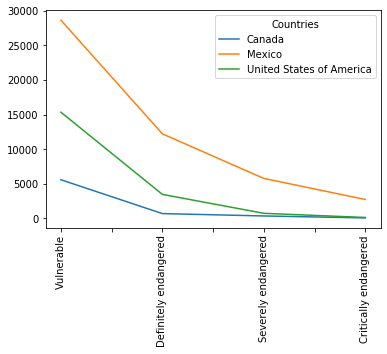

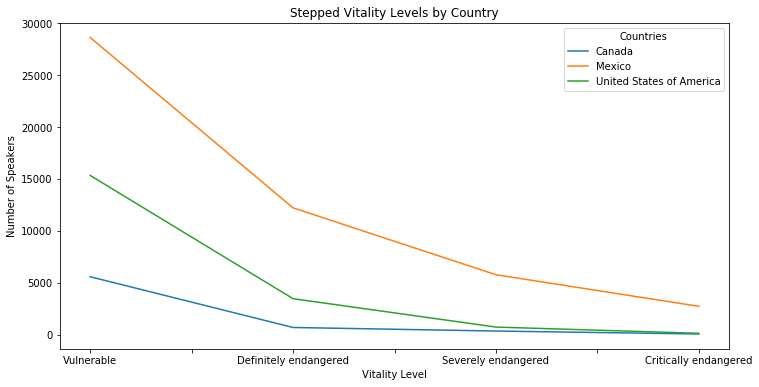

In [85]:
Vuln_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Vulnerable'), :]) 
Vuln_DF = round(pd.DataFrame(Vuln_DF.groupby(['Countries']).mean()['Number of speakers']),1)
Vuln_DF = Vuln_DF.rename(columns = {'Number of speakers':'Vulnerable'})
#Definitely Endangered 
Def_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Definitely endangered'), :])
Def_DF = round(pd.DataFrame(Def_DF.groupby(['Countries']).mean()['Number of speakers']),1)
Def_DF = Def_DF.rename(columns = {'Number of speakers':'Definitely endangered'})
#Severly Endangered
Sev_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Severely endangered'), :]) 
Sev_DF = round(pd.DataFrame(Sev_DF.groupby(['Countries']).mean()['Number of speakers']),1)
Sev_DF = Sev_DF.rename(columns = {'Number of speakers':'Severely endangered'})
Sev_DF
#Critically Endangered
Crit_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Critically endangered'), :]) 
Crit_DF = round(pd.DataFrame(Crit_DF.groupby(['Countries']).mean()['Number of speakers']),1)
#Crit_DF = pd.DataFrame(Crit_DF.groupby(['Countries']).count()['Number of speakers'])
Crit_DF = Crit_DF.rename(columns = {'Number of speakers':'Critically endangered'})
Crit_DF

#Merging Tables
speak_1 = pd.merge(Vuln_DF, Def_DF, on='Countries')
speak_2 = pd.merge(Crit_DF, Sev_DF, on='Countries')
speakers_DF = pd.merge(speak_1, speak_2, on='Countries')
#
#speakers_DF
#
speakers_DF = speakers_DF[['Vulnerable','Definitely endangered','Severely endangered','Critically endangered']]
speakers_DF = speakers_DF.transpose()
speakers_DF
#speakers_DF.plot(rot=90)
speakers_DF.plot(kind='line', figsize=(12, 6), title = "Stepped Vitality Levels by Country", rot=0)
plt.xlabel('Vitality Level')
plt.ylabel('Number of Speakers')

In [78]:
Vulnmin_DF = File_DF.groupby(['Countries'])
#Vulmnmin_DF = Vulnmin_DF
Vulnmin_DF = Vulnmin_DF['Number of speakers']
Vulnmin_DF.describe()

,count,mean,std,min,25%,50%,75%,max
Countries,,,,,,,,
Canada,63.0,2326.126984,3935.613599,0.0,135.00,570.0,3222.50,20933.0
"Canada, United States of America",8.0,552.500000,626.446897,130.0,168.75,345.0,558.75,2000.0
Mexico,141.0,15154.673759,53880.046224,3.0,312.00,1074.0,7977.00,463183.0
United States of America,207.0,1659.067633,8797.779579,0.0,1.00,25.0,425.00,120000.0


In [82]:
Vuln_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Vulnerable'), :]) 
Vuln_DF = pd.DataFrame(Vuln_DF.groupby(['Countries']).min()['Number of speakers'])
Vuln_DF = Vuln_DF.rename(columns = {'Number of speakers':'Vulnerable'})
#Definitely Endangered 
Def_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Definitely endangered'), :])
Def_DF = pd.DataFrame(Def_DF.groupby(['Countries']).min()['Number of speakers'])
Def_DF = Def_DF.rename(columns = {'Number of speakers':'Definitely endangered'})
#Severly Endangered
Sev_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Severely endangered'), :]) 
Sev_DF = pd.DataFrame(Sev_DF.groupby(['Countries']).min()['Number of speakers'])
Sev_DF = Sev_DF.rename(columns = {'Number of speakers':'Severely endangered'})
Sev_DF
#Critically Endangered
Crit_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Critically endangered'), :]) 
Crit_DF = pd.DataFrame(Crit_DF.groupby(['Countries']).min()['Number of speakers'])
#Crit_DF = pd.DataFrame(Crit_DF.groupby(['Countries']).count()['Number of speakers'])
Crit_DF = Crit_DF.rename(columns = {'Number of speakers':'Critically endangered'})
Crit_DF

#Merging Tables
speak_1 = pd.merge(Vuln_DF, Def_DF, on='Countries')
speak_2 = pd.merge(Crit_DF, Sev_DF, on='Countries')
speakers_DF = pd.merge(speak_1, speak_2, on='Countries')

speakers_DF = speakers_DF[['Vulnerable','Definitely endangered','Severely endangered','Critically endangered']]
speakers_DF = speakers_DF.transpose()
speakers_DF.plot()

AssertionError: 

In [22]:
Merge_DF.mean()

Vulnerable               30.000000
Definitely endangered    27.333333
Critically Endangered    43.000000
Severely Endangered      28.000000
dtype: float64

In [6]:
#Create New Columns 
Corr_DF = pd.DataFrame(File_DF.groupby(['Countries']).count())
Corr_DF['Vulnerable'] = Vulnerable_DF
Corr_DF["Definitely Endangered"] = Definitely_Endangered_DF
Corr_DF["Critically Endangered"] = Critically_Endangered_DF
Corr_DF["Severely Endangered"] = Severely_Endangered_DF
Corr_DF = Corr_DF[['Vulnerable', 'Definitely Endangered', 'Critically Endangered', 'Severely Endangered', 'Number of speakers','Speaker Percentage']]
#Correlation between degrees of endangerment
Correlation_DF = round(Corr_DF.corr(), 2)
Correlation_DF = pd.DataFrame(Correlation_DF[['Number of speakers','Speaker Percentage']])
Correlation_DF.drop(Correlation_DF.tail(1).index,inplace=True)
Corr_df = Correlation_DF.style.applymap(color_code)
Corr_df

,Number of speakers,Speaker Percentage
Vulnerable,-0.210000,-0.300000
Definitely Endangered,0.830000,0.820000
Critically Endangered,0.860000,0.890000
Severely Endangered,0.990000,0.970000
Number of speakers,1.000000,1.000000


In [17]:
#Create New Columns
America = File_DF[(File_DF['Countries'] == "United States of America")]
Canada = File_DF[(File_DF['Countries'] == 'Canada')]
Mexico = File_DF[(File_DF['Countries'] == 'Mexico')]
Canada_America = File_DF[(File_DF['Degree of endangerment'] == 'Canada, United States of America')]
#Group By Degree of Endangerment
America = America.groupby(['Degree of endangerment']).count()['Population']
Canada = Canada.groupby(['Degree of endangerment']).count()['Population']
Mexico = Mexico.groupby(['Degree of endangerment']).count()['Population']
Canada_America = Canada_America.groupby(['Degree of endangerment']).count()['Population']
#Create New Columns 
Country_DF = pd.DataFrame(File_DF.groupby(['Degree of endangerment']).count())
Country_DF['America'] = America
Country_DF["Canada"] = Canada
Country_DF["Mexico"] = Mexico
Country_DF["Canada_America"] = Canada_America
#Country_DF = Country_DF.drop('Extinct')
Country_DF = Country_DF[['America', 'Canada', 'Mexico']]
# Correlaion Between Countries
Country_DF = round(Country_DF.corr(), 2)
Country_df = Country_DF.style.applymap(color_code)
Country_df

,America,Canada,Mexico
America,1.000000,0.070000,-0.940000
Canada,0.070000,1.000000,-0.110000
Mexico,-0.940000,-0.110000,1.000000


Text(0, 0.5, 'Count')

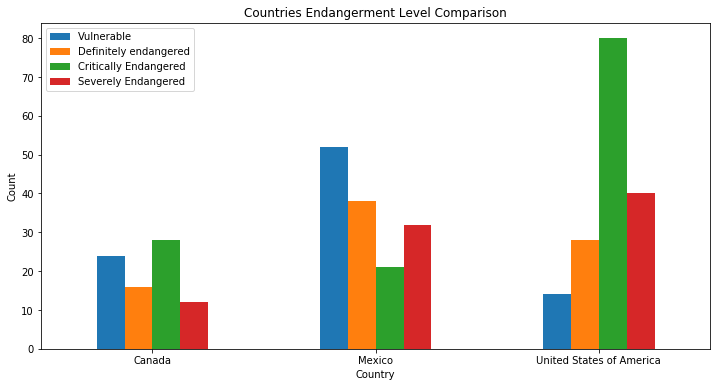

In [19]:
#Create a Bar Plot of all four endangerment levels
Merge_DF.plot(kind='bar', figsize=(12, 6), title = "Countries Endangerment Level Comparison", rot=0)
plt.xlabel('Country')
plt.ylabel('Count')

In [9]:
#Correlation between Mexico and United States: Vulnerable vs. Critically Endangered
Final_Correlation = Merge_DF[['Vulnerable', 'Critically Endangered']]
Final_Correlation.drop('Canada')
Final_Correlation = round(Final_Correlation.corr(), 2)
Final_Correlation = Final_Correlation.style.applymap(color_code)
Final_Correlation

,Vulnerable,Critically Endangered
Vulnerable,1.000000,-0.780000
Critically Endangered,-0.780000,1.000000


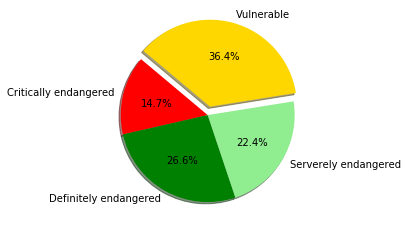

In [13]:
labels = ["Critically endangered", "Definitely endangered", "Serverely endangered", "Vulnerable"]
sizes = [21, 38, 32, 52]
colors = ["red", "green", "lightgreen", "gold"]
explode = (0,0,0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title = "Mexico"

([<matplotlib.patches.Wedge at 0x176bfddd648>,
 [Text(-0.9829959231867643, -0.4936790607248813, 'Critically endangered'),
  Text(0.4936790147075205, -0.982995946297548, 'Definitely endangered'),
  Text(1.0958141768770358, 0.09587121442489636, 'Extinct'),
  Text(0.13931163127449003, 1.191886013590075, 'Serverely endangered'),
  Text(-0.6822589229554096, 0.8628573242707769, 'Vulnerable')],
 [Text(-0.5361795944655078, -0.26927948766811705, '37.0%'),
  Text(0.26927946256773844, -0.5361796070713898, '13.0%'),
  Text(0.5977168237511103, 0.052293389686307104, '25.0%'),
  Text(0.0812651182434525, 0.6952668412608771, '18.5%'),
  Text(-0.37214123070295063, 0.47064944960224186, '6.5%')])

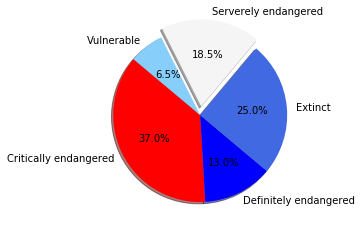

In [15]:
labels = ["Critically endangered", "Definitely endangered", "Extinct", "Serverely endangered", "Vulnerable"]
sizes = [80, 28, 54, 40, 14]
colors = ["red", "blue", "royalblue", "whitesmoke", "lightskyblue"]
explode = (0,0,0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

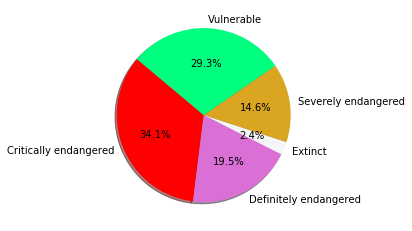

In [16]:
labels = ["Critically endangered", "Definitely endangered","Extinct", "Severely endangered", "Vulnerable"]
sizes = [28,16,2,12,24]
colors = ["red", "orchid", "whitesmoke", "goldenrod", "springgreen"]
explode = (0,0,0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title = "Canada"

In [10]:
Degree = pd.DataFrame(File_DF.groupby(['Countries', 'Degree of endangerment']).count()['ID'])
degree = Degree.iloc[8:12]
degree.plot(kind='pie', subplots='True')

KeyError: 'ID'

In [ ]:
Degree

In [11]:
df2 = pd.DataFrame({
    'Degree': ['Vulnerable', 'Definetly endangered', 'Critically endangered', 'Severly endangered', 'Extinct']})
df = pd.merge(df, df2, on='day')
df = df.sort_values('num')
dfx = df.groupby(['group'])
dfx.plot(kind='bar', x='day')

NameError: name 'df' is not defined

In [ ]:
File_df.head(25)